# LOADING THE DATASET

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
data=pd.read_csv("abalone.csv")

In [2]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
Age=1.5+data.Rings
data["Age"]=Age
data= data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Univariate analysis

<AxesSubplot:xlabel='Sex', ylabel='Count'>

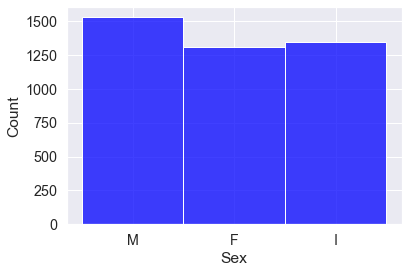

In [7]:
#univariate analysis
sns.histplot(x=data.Sex,color='blue') 

<AxesSubplot:xlabel='Length'>

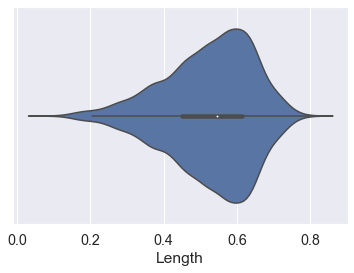

In [6]:
sns.violinplot(x=data["Length"])

## bivariate analysis

Text(0, 0.5, 'Shucked weight')

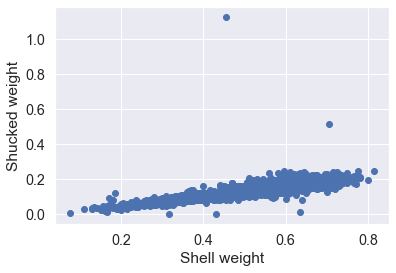

In [8]:
#Bivariate analysis
import matplotlib.pyplot as plt

#create scatterplot of hours vs. score
plt.scatter(data.Length, data.Height)
plt.xlabel('Shell weight')
plt.ylabel('Shucked weight')

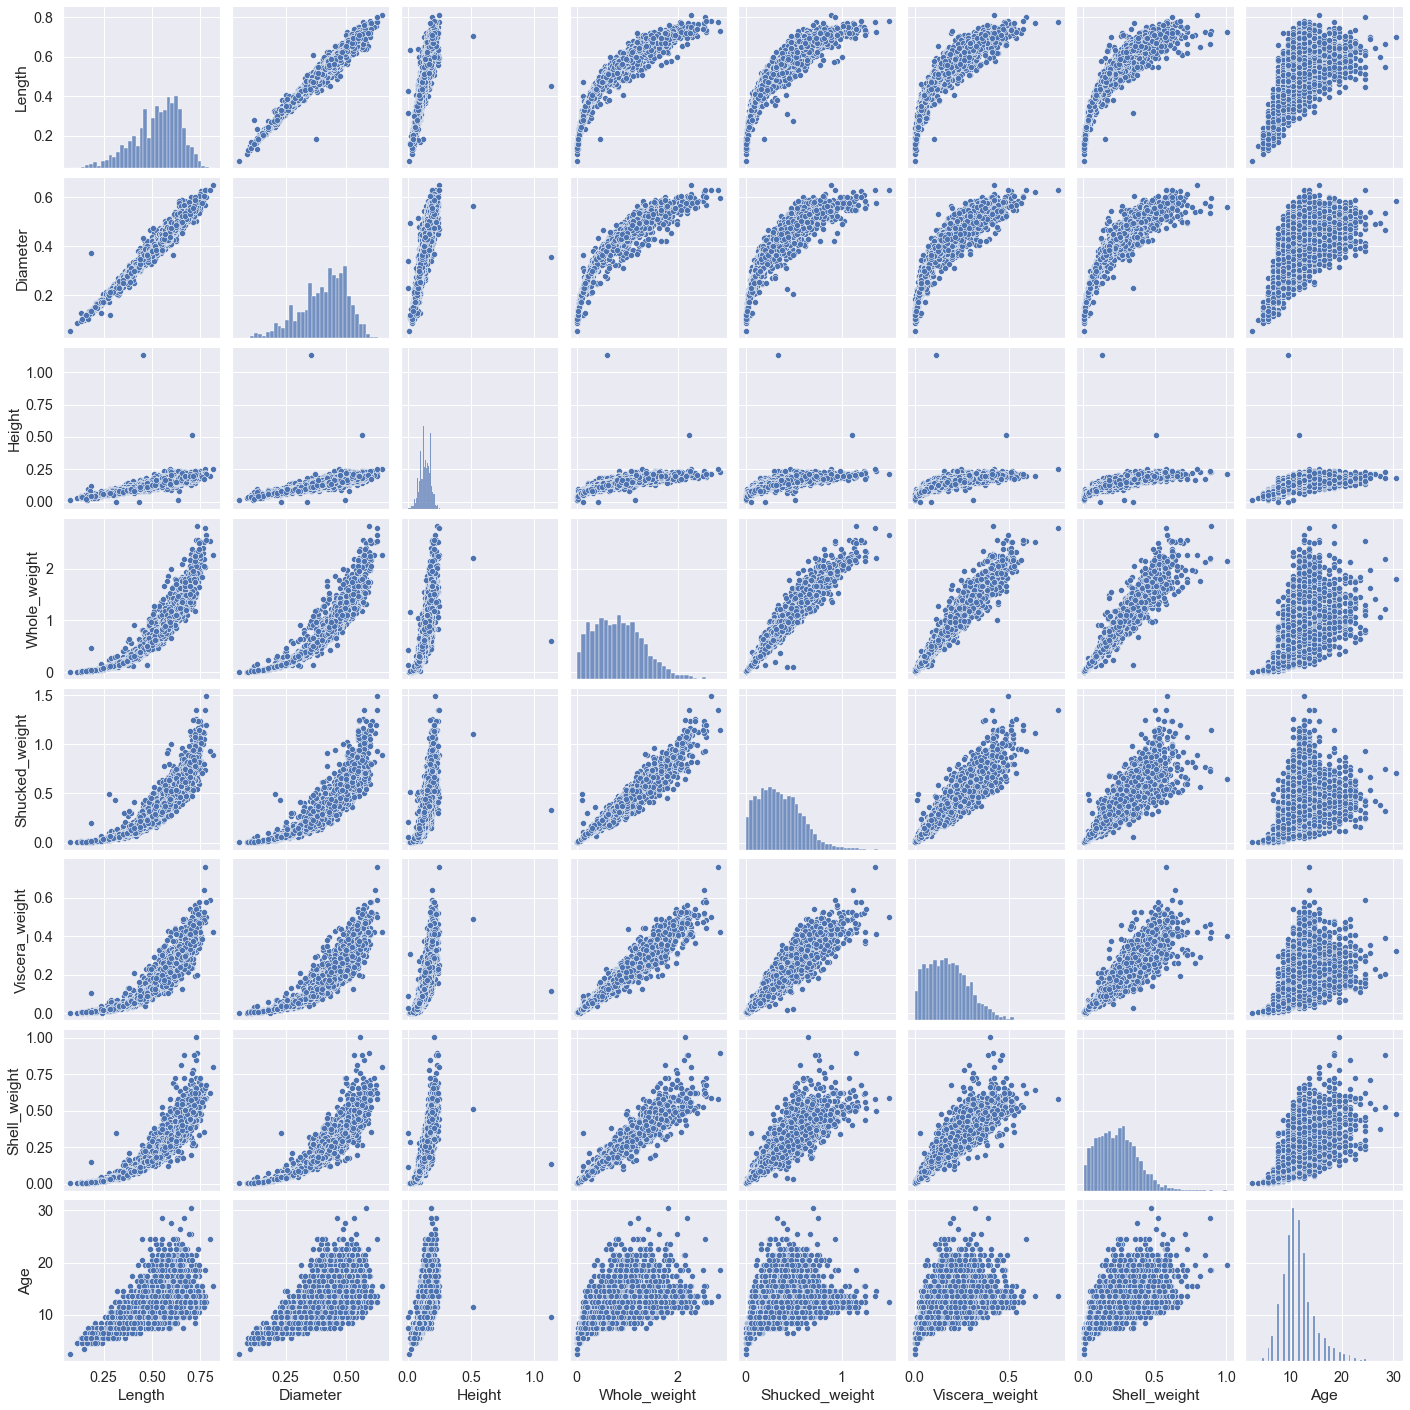

In [9]:
#multivariate analysis
sns.pairplot(data)

# 4. descriptive statistics on dataset

In [12]:
df = pd.DataFrame(data)
df[['Length','Height']].mean() 

Length    0.523992
Height    0.139516
dtype: float64

In [14]:
df[['Length','Height']].median() 

Length    0.545
Height    0.140
dtype: float64

# 5 Check for missing values

In [15]:
#identifying the missing value
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

# 6 Identify outliers and replace them

<AxesSubplot:xlabel='Length'>

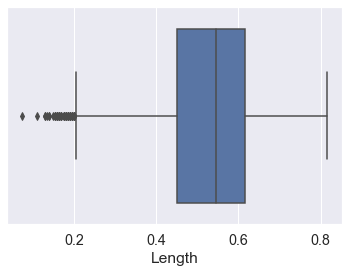

In [16]:
#identifying the outliers
sns.boxplot(x=df["Length"])


<AxesSubplot:xlabel='Length'>

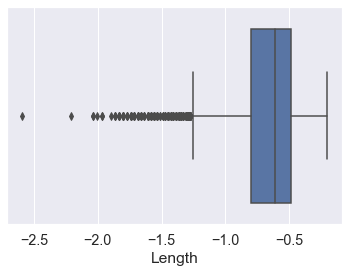

In [17]:
#replacing the outliers
df_Length_log = np.log(df['Length'])
sns.boxplot(x=df_Length_log)

# Check for categorial columns and perform encoding

In [18]:
#perform encoding
df_categorical = df['Sex']
df_categorical.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

let_encoder = LabelEncoder() #To perform encoding
let_encoder.fit(df_categorical)

LabelEncoder()

In [20]:
let_values = let_encoder.transform(df_categorical)
print("Before Encoding:", list(df_categorical[-10:]))
print("After Encoding:", let_values[-10:])

Before Encoding: ['M', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M']
After Encoding: [2 0 2 2 2 0 2 2 0 2]


# Split data into dependent and independent variables

In [21]:
y = data["Sex"]
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [22]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Scale the independent variables

In [23]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


# Split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [25]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [26]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [27]:
X_Test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.951154
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.599818
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.330765
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.530402
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.640960


In [28]:
Y_Test.head()

668     M
1580    I
3784    M
463     I
2615    M
Name: Sex, dtype: object

# Building,Training and testing the model

In [29]:
# Select algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [30]:
# Evaluate the model on the test data
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
y_predict = model.predict(X_Test)
y_predict_train = model.predict(X_Train)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9787488775815624


# Performance metrics

In [34]:
pd.crosstab(Y_Test,y_predict)

col_0,F,I,M
Sex,,,
F,92,29,128
I,38,214,39
M,122,58,116


In [35]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           F       0.37      0.37      0.37       249
           I       0.71      0.74      0.72       291
           M       0.41      0.39      0.40       296

    accuracy                           0.50       836
   macro avg       0.50      0.50      0.50       836
weighted avg       0.50      0.50      0.50       836

